In [1]:
#Describe your Dataset
    #1. Background/where does it come frome?
    #Contains 'apartment availabilities' collected in the state of COlorado since the beginning of 2015
    #Data from a team of 200 'mystery shoppers' that call apartments as if they are renters
        #Team gets quoted rents on actually available apartments, and importantly, quoted discounts/concession offerings
    #Concessions can be initially broken down into three types, no-special, non-rent special (i.e. waived move-in fee), and rent special (i.e. one-month free)
    #Why is it interesting or significant?
    #Can look at trends over time with created date, or the observation date.
    #Can look at data by different metro areas (i.e. Denver vs. Colorado Srings)
    #concessions can be an extremely good indicator of the leasing environment (favorable to renters, unfavorable)
        #can potentially be a powerful tool for renters (knowing which neighborhoods or even properties are offering good deals)
        #relevant to competitive behavior for apartment owners based on what concessions nearby properties offer
        #seasonality of concessions (leasing is much more active in summer) can be investigated
#***


import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
apt_data = pd.read_csv('ColoradoAptData.csv', encoding='latin-1') 
                       #converters ={'CreatedDate': pd.to_datetime})
                       #,sep = '\',  encoding='latin-1')

In [3]:
apt_data

,PropertyID,YearBuilt,CreatedDate,ClusterName,MinRent,SpecialOfferTypeDesc,NumFreeMonths,NumDiscountedMonths,MonthlyDiscountAmount,CBSA,AltDate,oMonth,oYear
0,825554,1984,53:58.4,Longmont/Northwest Boulder County MF,795,NaN,NaN,NaN,NaN,"Boulder, CO",07/12/2016,7,2016
1,825554,1984,48:10.3,Longmont/Northwest Boulder County MF,850,NaN,NaN,NaN,NaN,"Boulder, CO",09/25/2015,9,2015
2,825554,1984,56:06.1,Longmont/Northwest Boulder County MF,695,NaN,NaN,NaN,NaN,"Boulder, CO",02/02/2015,2,2015
3,825554,1984,56:06.1,Longmont/Northwest Boulder County MF,695,NaN,NaN,NaN,NaN,"Boulder, CO",02/02/2015,2,2015
4,825554,1984,24:32.5,Longmont/Northwest Boulder County MF,950,NaN,NaN,NaN,NaN,"Boulder, CO",05/11/2016,5,2016
5,825554,1984,53:58.4,Longmont/Northwest Boulder County MF,795,NaN,NaN,NaN,NaN,"Boulder, CO",07/12/2016,7,2016
6,825554,1984,35:58.5,Longmont/Northwest Boulder County MF,775,NaN,NaN,NaN,NaN,"Boulder, CO",01/18/2017,1,2017
7,848324,1961,04:40.3,Longmont/Northwest Boulder County MF,725,NaN,NaN,NaN,NaN,"Boulder, CO",12/08/2016,12,2016
8,848324,1961,32:20.1,Longmont/Northwest Boulder County MF,695,NaN,NaN,NaN,NaN,"Boulder, CO",05/03/2017,5,2017
9,848324,1961,00:22.5,Longmont/Northwest Boulder County MF,795,NaN,NaN,NaN,NaN,"Boulder, CO",01/26/2016,1,2016


In [4]:
#number of properties in data set

unique_pids = apt_data['PropertyID'].value_counts()
len(unique_pids)

2264

In [5]:
#Summary Statistics on Variables I will Use
    #PropertyID
        #unique ID attached to a given apartment building. probably won't look at much from a building-level perspective...
        #for this exercise, but worth looking at some stats 
    #CreatedDate
        #date observation was collected, will be used (and format changed probably to monthly) to look at time series
    #Rent
        #probably not going to look at the rent for this exercise
    #Special offer type
        #allows you to identify if no special, non-rent special, or rent special
    #NumFreeMonths, NumDiscountedMonths, MonthlyDiscountAmount
        #for rent specials, these allow you to figure out the amount of the concession, which can ultimately be used to create a 'concession rate'
        #might try to replicate this calculation in python, since it's something I sometimes do when working with this data
    #CBSA
        #the metro area (all Colorado) in which the observation/building is located
    #Year Built
        #may create an accompanying series that only looks at the results if you remove buildings constructed
        #from 2010-present. New construction buildings offer concessions much more regularly, may be interesting to look at trends excluding these buildings
    

In [6]:
#average number of observations (apartment availabilities recorded) for a given PID (full series)
np.average(unique_pids)

121.16475265017668

In [7]:
np.median(unique_pids)

42.0

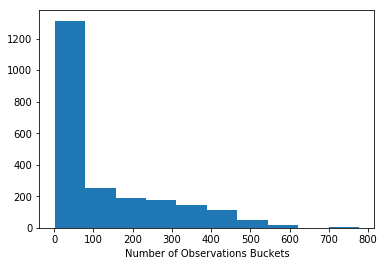

In [8]:
#About half of PIDs have 
plt.hist(unique_pids)
plt.xlabel('Number of Observations Buckets')
plt.show()

In [9]:
#Find the metro areas included in this data set
unique_metros = apt_data['CBSA'].value_counts()

In [10]:
unique_metros
pdum = pd.DataFrame()
pdum = unique_metros
pdum

Denver-Aurora-Lakewood, CO    203248
Colorado Springs, CO           38037
Boulder, CO                    12663
Fort Collins, CO               12215
Greeley, CO                     4249
Pueblo, CO                      1906
Grand Junction, CO               692
Glenwood Springs, CO             372
Durango, CO                      340
Edwards, CO                      302
Craig, CO                         93
Steamboat Springs, CO             56
Cañon City, CO                    53
Breckenridge, CO                  49
Sterling, CO                      39
Montrose, CO                       3
Name: CBSA, dtype: int64

In [11]:
discount_types = apt_data.SpecialOfferTypeDesc.value_counts()

In [12]:
#types of discount, count of each discount
discount_types

Other Concession             33286
Temporary Rent Reducation    31623
Free Rent                    12238
Permanent Rent Reduction      4772
Name: SpecialOfferTypeDesc, dtype: int64

In [13]:
#total with some sort of discount
discount_types.sum()

81919

In [14]:
#total
len(apt_data)

274317

In [15]:
#Total without discount
len(apt_data) - discount_types.sum()

192398

In [16]:
#Percent with any sort of discount, 30%
discount_types.sum()/len(apt_data)

0.2986289584677581

In [17]:
#Percent with a rent discount (Other Concession denotes a non-rent concession)
(discount_types.sum() - discount_types['Other Concession'].sum())/len(apt_data)

0.17728759063419328

In [18]:
#Analytic Questions
    #1. How have concessions trended in the state of colorado from 2015-Present?
        #How does that vary depending upon the metro area?
    #2. Are concessions significantly different when excluding new construction?
        #what percentage of concessions are rent concessions?
    #3. Which months have the highest concession frequency?
        #bonus: is there a day of the week with a statistically signficant higher or lower frequency of concessions?
    

In [19]:
#Need to change observation date to month-year
#need to add columns that will allow concessions to be grouped into different buckets 
    #(1 if any concession, 1 if rent concession, 0 otherwise)
#Will remove metro areas with insignificant number of observations


In [20]:
#Get total number of Observations by Metro as Column
#suffix or prefix
apt_data_a = pd.merge(apt_data, pdum.to_frame(), left_on = 'CBSA', right_index = True)
apt_data_a

,CBSA,PropertyID,YearBuilt,CreatedDate,ClusterName,MinRent,SpecialOfferTypeDesc,NumFreeMonths,NumDiscountedMonths,MonthlyDiscountAmount,CBSA_x,AltDate,oMonth,oYear,CBSA_y
0,"Boulder, CO",825554,1984,53:58.4,Longmont/Northwest Boulder County MF,795,NaN,NaN,NaN,NaN,"Boulder, CO",07/12/2016,7,2016,12663
1,"Boulder, CO",825554,1984,48:10.3,Longmont/Northwest Boulder County MF,850,NaN,NaN,NaN,NaN,"Boulder, CO",09/25/2015,9,2015,12663
2,"Boulder, CO",825554,1984,56:06.1,Longmont/Northwest Boulder County MF,695,NaN,NaN,NaN,NaN,"Boulder, CO",02/02/2015,2,2015,12663
3,"Boulder, CO",825554,1984,56:06.1,Longmont/Northwest Boulder County MF,695,NaN,NaN,NaN,NaN,"Boulder, CO",02/02/2015,2,2015,12663
4,"Boulder, CO",825554,1984,24:32.5,Longmont/Northwest Boulder County MF,950,NaN,NaN,NaN,NaN,"Boulder, CO",05/11/2016,5,2016,12663
5,"Boulder, CO",825554,1984,53:58.4,Longmont/Northwest Boulder County MF,795,NaN,NaN,NaN,NaN,"Boulder, CO",07/12/2016,7,2016,12663
6,"Boulder, CO",825554,1984,35:58.5,Longmont/Northwest Boulder County MF,775,NaN,NaN,NaN,NaN,"Boulder, CO",01/18/2017,1,2017,12663
7,"Boulder, CO",848324,1961,04:40.3,Longmont/Northwest Boulder County MF,725,NaN,NaN,NaN,NaN,"Boulder, CO",12/08/2016,12,2016,12663
8,"Boulder, CO",848324,1961,32:20.1,Longmont/Northwest Boulder County MF,695,NaN,NaN,NaN,NaN,"Boulder, CO",05/03/2017,5,2017,12663
9,"Boulder, CO",848324,1961,00:22.5,Longmont/Northwest Boulder County MF,795,NaN,NaN,NaN,NaN,"Boulder, CO",01/26/2016,1,2016,12663


In [21]:
#Remove metros where less than 2000 observations since start of 2015
apt_data_b = apt_data_a[apt_data_a['CBSA_y'] >=2000]

In [22]:
apt_data_b

,CBSA,PropertyID,YearBuilt,CreatedDate,ClusterName,MinRent,SpecialOfferTypeDesc,NumFreeMonths,NumDiscountedMonths,MonthlyDiscountAmount,CBSA_x,AltDate,oMonth,oYear,CBSA_y
0,"Boulder, CO",825554,1984,53:58.4,Longmont/Northwest Boulder County MF,795,NaN,NaN,NaN,NaN,"Boulder, CO",07/12/2016,7,2016,12663
1,"Boulder, CO",825554,1984,48:10.3,Longmont/Northwest Boulder County MF,850,NaN,NaN,NaN,NaN,"Boulder, CO",09/25/2015,9,2015,12663
2,"Boulder, CO",825554,1984,56:06.1,Longmont/Northwest Boulder County MF,695,NaN,NaN,NaN,NaN,"Boulder, CO",02/02/2015,2,2015,12663
3,"Boulder, CO",825554,1984,56:06.1,Longmont/Northwest Boulder County MF,695,NaN,NaN,NaN,NaN,"Boulder, CO",02/02/2015,2,2015,12663
4,"Boulder, CO",825554,1984,24:32.5,Longmont/Northwest Boulder County MF,950,NaN,NaN,NaN,NaN,"Boulder, CO",05/11/2016,5,2016,12663
5,"Boulder, CO",825554,1984,53:58.4,Longmont/Northwest Boulder County MF,795,NaN,NaN,NaN,NaN,"Boulder, CO",07/12/2016,7,2016,12663
6,"Boulder, CO",825554,1984,35:58.5,Longmont/Northwest Boulder County MF,775,NaN,NaN,NaN,NaN,"Boulder, CO",01/18/2017,1,2017,12663
7,"Boulder, CO",848324,1961,04:40.3,Longmont/Northwest Boulder County MF,725,NaN,NaN,NaN,NaN,"Boulder, CO",12/08/2016,12,2016,12663
8,"Boulder, CO",848324,1961,32:20.1,Longmont/Northwest Boulder County MF,695,NaN,NaN,NaN,NaN,"Boulder, CO",05/03/2017,5,2017,12663
9,"Boulder, CO",848324,1961,00:22.5,Longmont/Northwest Boulder County MF,795,NaN,NaN,NaN,NaN,"Boulder, CO",01/26/2016,1,2016,12663


In [23]:
#New Metro List and Counts. Results in the five primary metro areas as desired
apt_data_b.CBSA.value_counts()

Denver-Aurora-Lakewood, CO    203248
Colorado Springs, CO           38037
Boulder, CO                    12663
Fort Collins, CO               12215
Greeley, CO                     4249
Name: CBSA, dtype: int64

In [24]:
#Add "Any Special" Column
#apt_data_b['Any_Special'] = np.where(np.isnan(apt_data_b['SpecialOfferTypeDesc']), 0, 1)

In [25]:
#apt_data_b.loc[(apt_data_b['SpecialOfferTypeDesc'].isnull()) | (apt_data_b['SpecialOfferTypeDesc'].str.strip() == 'Permanent Rent Reduction')  ,'SpecialOfferTypeDesc'] = 'No Discount'
#apt_data_b
               #row location, column location |=or

In [26]:
apt_data_b['SpecialOfferTypeDesc'].fillna('NoDiscount', inplace=True)

C:\Users\dpierce\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [27]:
apt_data_b

,CBSA,PropertyID,YearBuilt,CreatedDate,ClusterName,MinRent,SpecialOfferTypeDesc,NumFreeMonths,NumDiscountedMonths,MonthlyDiscountAmount,CBSA_x,AltDate,oMonth,oYear,CBSA_y
0,"Boulder, CO",825554,1984,53:58.4,Longmont/Northwest Boulder County MF,795,NoDiscount,NaN,NaN,NaN,"Boulder, CO",07/12/2016,7,2016,12663
1,"Boulder, CO",825554,1984,48:10.3,Longmont/Northwest Boulder County MF,850,NoDiscount,NaN,NaN,NaN,"Boulder, CO",09/25/2015,9,2015,12663
2,"Boulder, CO",825554,1984,56:06.1,Longmont/Northwest Boulder County MF,695,NoDiscount,NaN,NaN,NaN,"Boulder, CO",02/02/2015,2,2015,12663
3,"Boulder, CO",825554,1984,56:06.1,Longmont/Northwest Boulder County MF,695,NoDiscount,NaN,NaN,NaN,"Boulder, CO",02/02/2015,2,2015,12663
4,"Boulder, CO",825554,1984,24:32.5,Longmont/Northwest Boulder County MF,950,NoDiscount,NaN,NaN,NaN,"Boulder, CO",05/11/2016,5,2016,12663
5,"Boulder, CO",825554,1984,53:58.4,Longmont/Northwest Boulder County MF,795,NoDiscount,NaN,NaN,NaN,"Boulder, CO",07/12/2016,7,2016,12663
6,"Boulder, CO",825554,1984,35:58.5,Longmont/Northwest Boulder County MF,775,NoDiscount,NaN,NaN,NaN,"Boulder, CO",01/18/2017,1,2017,12663
7,"Boulder, CO",848324,1961,04:40.3,Longmont/Northwest Boulder County MF,725,NoDiscount,NaN,NaN,NaN,"Boulder, CO",12/08/2016,12,2016,12663
8,"Boulder, CO",848324,1961,32:20.1,Longmont/Northwest Boulder County MF,695,NoDiscount,NaN,NaN,NaN,"Boulder, CO",05/03/2017,5,2017,12663
9,"Boulder, CO",848324,1961,00:22.5,Longmont/Northwest Boulder County MF,795,NoDiscount,NaN,NaN,NaN,"Boulder, CO",01/26/2016,1,2016,12663


In [28]:
#Add "Any Special" Column
apt_data_b['Any_Special'] = np.where(apt_data_b['SpecialOfferTypeDesc'] == 'NoDiscount', 0, 1)

C:\Users\dpierce\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [29]:
apt_data_b['AnyRentSpecial'] = np.where(np.logical_or(apt_data_b['SpecialOfferTypeDesc'] == 'NoDiscount', apt_data_b['SpecialOfferTypeDesc'] == 'Other Concession'), 0, 1)

C:\Users\dpierce\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
#apt_data_b

#remove unnecessary columns
apt_data_c = apt_data_b.drop(['CBSA_x', 'CBSA_y','NumFreeMonths','NumDiscountedMonths','MonthlyDiscountAmount'], axis=1)

In [86]:
#data frame that is the same, but removes partial year 2019 data
apt_data_d = apt_data_c.loc[apt_data_c['oYear'] <= 2018]

apt_data_d

,CBSA,PropertyID,YearBuilt,CreatedDate,ClusterName,MinRent,SpecialOfferTypeDesc,AltDate,oMonth,oYear,Any_Special,AnyRentSpecial
0,"Boulder, CO",825554,1984,53:58.4,Longmont/Northwest Boulder County MF,795,NoDiscount,07/12/2016,7,2016,0,0
1,"Boulder, CO",825554,1984,48:10.3,Longmont/Northwest Boulder County MF,850,NoDiscount,09/25/2015,9,2015,0,0
2,"Boulder, CO",825554,1984,56:06.1,Longmont/Northwest Boulder County MF,695,NoDiscount,02/02/2015,2,2015,0,0
3,"Boulder, CO",825554,1984,56:06.1,Longmont/Northwest Boulder County MF,695,NoDiscount,02/02/2015,2,2015,0,0
4,"Boulder, CO",825554,1984,24:32.5,Longmont/Northwest Boulder County MF,950,NoDiscount,05/11/2016,5,2016,0,0
5,"Boulder, CO",825554,1984,53:58.4,Longmont/Northwest Boulder County MF,795,NoDiscount,07/12/2016,7,2016,0,0
6,"Boulder, CO",825554,1984,35:58.5,Longmont/Northwest Boulder County MF,775,NoDiscount,01/18/2017,1,2017,0,0
7,"Boulder, CO",848324,1961,04:40.3,Longmont/Northwest Boulder County MF,725,NoDiscount,12/08/2016,12,2016,0,0
8,"Boulder, CO",848324,1961,32:20.1,Longmont/Northwest Boulder County MF,695,NoDiscount,05/03/2017,5,2017,0,0
9,"Boulder, CO",848324,1961,00:22.5,Longmont/Northwest Boulder County MF,795,NoDiscount,01/26/2016,1,2016,0,0


In [32]:
#apt_data_c['Year_Month'] = apt_data_c.oYear.map(str) + ' - ' + apt_data_c.oMonth.map(str)


In [33]:
apt_data_d['Yr_Month'] = pd.to_datetime([f'{y}-{m}' for y, m in zip(apt_data_d.oYear, apt_data_d.oMonth)])
apt_data_d

C:\Users\dpierce\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,CBSA,PropertyID,YearBuilt,CreatedDate,ClusterName,MinRent,SpecialOfferTypeDesc,AltDate,oMonth,oYear,Any_Special,AnyRentSpecial,Yr_Month
0,"Boulder, CO",825554,1984,53:58.4,Longmont/Northwest Boulder County MF,795,NoDiscount,07/12/2016,7,2016,0,0,2016-07-01
1,"Boulder, CO",825554,1984,48:10.3,Longmont/Northwest Boulder County MF,850,NoDiscount,09/25/2015,9,2015,0,0,2015-09-01
2,"Boulder, CO",825554,1984,56:06.1,Longmont/Northwest Boulder County MF,695,NoDiscount,02/02/2015,2,2015,0,0,2015-02-01
3,"Boulder, CO",825554,1984,56:06.1,Longmont/Northwest Boulder County MF,695,NoDiscount,02/02/2015,2,2015,0,0,2015-02-01
4,"Boulder, CO",825554,1984,24:32.5,Longmont/Northwest Boulder County MF,950,NoDiscount,05/11/2016,5,2016,0,0,2016-05-01
5,"Boulder, CO",825554,1984,53:58.4,Longmont/Northwest Boulder County MF,795,NoDiscount,07/12/2016,7,2016,0,0,2016-07-01
6,"Boulder, CO",825554,1984,35:58.5,Longmont/Northwest Boulder County MF,775,NoDiscount,01/18/2017,1,2017,0,0,2017-01-01
7,"Boulder, CO",848324,1961,04:40.3,Longmont/Northwest Boulder County MF,725,NoDiscount,12/08/2016,12,2016,0,0,2016-12-01
8,"Boulder, CO",848324,1961,32:20.1,Longmont/Northwest Boulder County MF,695,NoDiscount,05/03/2017,5,2017,0,0,2017-05-01
9,"Boulder, CO",848324,1961,00:22.5,Longmont/Northwest Boulder County MF,795,NoDiscount,01/26/2016,1,2016,0,0,2016-01-01


In [34]:
#Monthly Total by Metro. ****************Ignore, can do all at the same time in the example below.
#metro_monthly_obs = pd.DataFrame(apt_data_c.groupby(['CBSA','Yr_Month'])['PropertyID'].count())
#metro_monthly_obs

In [35]:
#lots of helpful stuff figured out here
metro_monthly = pd.DataFrame(apt_data_d.groupby(['CBSA','Yr_Month']).agg({'PropertyID':'count', 'Any_Special':'sum','AnyRentSpecial':'sum'}))
metro_monthly.reset_index(inplace=True)
metro_monthly['Any_Disc_Frequency'] = metro_monthly.Any_Special / metro_monthly.PropertyID
metro_monthly['Rent_Disc_Frequency'] = metro_monthly.AnyRentSpecial / metro_monthly.PropertyID
metro_monthly

,CBSA,Yr_Month,PropertyID,Any_Special,AnyRentSpecial,Any_Disc_Frequency,Rent_Disc_Frequency
0,"Boulder, CO",2015-01-01,228,72,42,0.315789,0.184211
1,"Boulder, CO",2015-02-01,192,45,26,0.234375,0.135417
2,"Boulder, CO",2015-03-01,251,70,41,0.278884,0.163347
3,"Boulder, CO",2015-04-01,250,22,16,0.088000,0.064000
4,"Boulder, CO",2015-05-01,227,32,24,0.140969,0.105727
5,"Boulder, CO",2015-06-01,253,37,21,0.146245,0.083004
6,"Boulder, CO",2015-07-01,277,58,35,0.209386,0.126354
7,"Boulder, CO",2015-08-01,214,22,10,0.102804,0.046729
8,"Boulder, CO",2015-09-01,200,38,16,0.190000,0.080000
9,"Boulder, CO",2015-10-01,125,30,19,0.240000,0.152000


In [36]:
#instead of by metro, just by state. what if I wanted to add this at the bottom of the previous chart?
co_monthly = pd.DataFrame(apt_data_d.groupby(['Yr_Month']).agg({'PropertyID':'count', 'Any_Special':'sum','AnyRentSpecial':'sum'}))
co_monthly.reset_index(inplace=True)
co_monthly['Any_Disc_Frequency'] = co_monthly.Any_Special / co_monthly.PropertyID
co_monthly['Rent_Disc_Frequency'] = co_monthly.AnyRentSpecial / co_monthly.PropertyID
co_monthly

,Yr_Month,PropertyID,Any_Special,AnyRentSpecial,Any_Disc_Frequency,Rent_Disc_Frequency
0,2015-01-01,4775,1141,621,0.238953,0.130052
1,2015-02-01,4277,862,516,0.201543,0.120645
2,2015-03-01,4829,956,563,0.197971,0.116587
3,2015-04-01,4816,818,509,0.169850,0.105689
4,2015-05-01,4115,675,421,0.164034,0.102309
5,2015-06-01,4628,665,363,0.143691,0.078436
6,2015-07-01,4828,846,444,0.175228,0.091964
7,2015-08-01,4398,644,332,0.146430,0.075489
8,2015-09-01,3828,705,401,0.184169,0.104754
9,2015-10-01,2800,692,429,0.247143,0.153214


In [42]:
#metro yearly, remove seasonality
metro_yearly = pd.DataFrame(apt_data_d.groupby(['CBSA','oYear']).agg({'PropertyID':'count', 'Any_Special':'sum','AnyRentSpecial':'sum'}))
metro_yearly.reset_index(inplace=True)
metro_yearly['Any_Disc_Frequency'] = metro_yearly.Any_Special / metro_yearly.PropertyID
metro_yearly['Rent_Disc_Frequency'] = metro_yearly.AnyRentSpecial / metro_yearly.PropertyID
metro_yearly

,CBSA,oYear,PropertyID,Any_Special,AnyRentSpecial,Any_Disc_Frequency,Rent_Disc_Frequency
0,"Boulder, CO",2015,2474,558,335,0.225546,0.135408
1,"Boulder, CO",2016,3275,1137,761,0.347176,0.232366
2,"Boulder, CO",2017,3573,1034,700,0.289393,0.195914
3,"Boulder, CO",2018,2859,698,512,0.244141,0.179084
4,"Colorado Springs, CO",2015,8685,2561,1780,0.294876,0.204951
5,"Colorado Springs, CO",2016,8646,1773,1226,0.205066,0.141800
6,"Colorado Springs, CO",2017,9560,2039,1552,0.213285,0.162343
7,"Colorado Springs, CO",2018,9508,2944,2137,0.309634,0.224758
8,"Denver-Aurora-Lakewood, CO",2015,35282,6331,3373,0.179440,0.095601
9,"Denver-Aurora-Lakewood, CO",2016,45662,13070,7201,0.286234,0.157702


In [45]:
#metro yearly, remove seasonality
co_yearly = pd.DataFrame(apt_data_d.groupby(['oYear']).agg({'PropertyID':'count', 'Any_Special':'sum','AnyRentSpecial':'sum'}))
co_yearly.reset_index(inplace=True)
co_yearly['Any_Disc_Frequency'] = co_yearly.Any_Special / co_yearly.PropertyID
co_yearly['Rent_Disc_Frequency'] = co_yearly.AnyRentSpecial / co_yearly.PropertyID
co_yearly

,oYear,PropertyID,Any_Special,AnyRentSpecial,Any_Disc_Frequency,Rent_Disc_Frequency
0,2015,49245,9869,5746,0.200406,0.116682
1,2016,61494,16954,9818,0.275702,0.159658
2,2017,76352,23443,13739,0.307038,0.179943
3,2018,70611,25828,15570,0.365779,0.220504


In [37]:
apt_data_d

,CBSA,PropertyID,YearBuilt,CreatedDate,ClusterName,MinRent,SpecialOfferTypeDesc,AltDate,oMonth,oYear,Any_Special,AnyRentSpecial,Yr_Month
0,"Boulder, CO",825554,1984,53:58.4,Longmont/Northwest Boulder County MF,795,NoDiscount,07/12/2016,7,2016,0,0,2016-07-01
1,"Boulder, CO",825554,1984,48:10.3,Longmont/Northwest Boulder County MF,850,NoDiscount,09/25/2015,9,2015,0,0,2015-09-01
2,"Boulder, CO",825554,1984,56:06.1,Longmont/Northwest Boulder County MF,695,NoDiscount,02/02/2015,2,2015,0,0,2015-02-01
3,"Boulder, CO",825554,1984,56:06.1,Longmont/Northwest Boulder County MF,695,NoDiscount,02/02/2015,2,2015,0,0,2015-02-01
4,"Boulder, CO",825554,1984,24:32.5,Longmont/Northwest Boulder County MF,950,NoDiscount,05/11/2016,5,2016,0,0,2016-05-01
5,"Boulder, CO",825554,1984,53:58.4,Longmont/Northwest Boulder County MF,795,NoDiscount,07/12/2016,7,2016,0,0,2016-07-01
6,"Boulder, CO",825554,1984,35:58.5,Longmont/Northwest Boulder County MF,775,NoDiscount,01/18/2017,1,2017,0,0,2017-01-01
7,"Boulder, CO",848324,1961,04:40.3,Longmont/Northwest Boulder County MF,725,NoDiscount,12/08/2016,12,2016,0,0,2016-12-01
8,"Boulder, CO",848324,1961,32:20.1,Longmont/Northwest Boulder County MF,695,NoDiscount,05/03/2017,5,2017,0,0,2017-05-01
9,"Boulder, CO",848324,1961,00:22.5,Longmont/Northwest Boulder County MF,795,NoDiscount,01/26/2016,1,2016,0,0,2016-01-01


In [44]:
import calendar
#by month, to isolate months with highest concessions
co_month = pd.DataFrame(apt_data_d.groupby(['oMonth']).agg({'PropertyID':'count', 'Any_Special':'sum','AnyRentSpecial':'sum'}))
co_month.reset_index(inplace=True)
co_month['Any_Disc_Frequency'] = co_month.Any_Special / co_month.PropertyID
co_month['Rent_Disc_Frequency'] = co_month.AnyRentSpecial / co_month.PropertyID
#change month number to name
co_month['Month'] = co_month['oMonth'].apply(lambda x: calendar.month_abbr[x])
co_month

,oMonth,PropertyID,Any_Special,AnyRentSpecial,Any_Disc_Frequency,Rent_Disc_Frequency,Month
0,1,20188,6806,4124,0.337131,0.204280,Jan
1,2,20285,6851,4038,0.337737,0.199063,Feb
2,3,25040,7864,4587,0.314058,0.183187,Mar
3,4,21278,5422,3255,0.254817,0.152975,Apr
4,5,21429,5199,2985,0.242615,0.139297,May
5,6,21764,5098,2881,0.234240,0.132375,Jun
6,7,20619,4736,2644,0.229691,0.128231,Jul
7,8,22903,5435,3021,0.237305,0.131904,Aug
8,9,21154,5700,3293,0.269453,0.155668,Sep
9,10,22143,7289,4302,0.329179,0.194283,Oct


In [39]:
metro_monthly['CBSA'].value_counts()

Denver-Aurora-Lakewood, CO    48
Colorado Springs, CO          48
Greeley, CO                   48
Boulder, CO                   48
Fort Collins, CO              48
Name: CBSA, dtype: int64

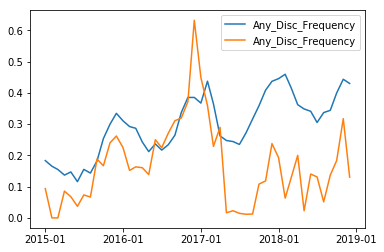

In [40]:
#Tool to compare concession trends across metros
import matplotlib.ticker as ticker
metro_for_chart_A = 'Denver-Aurora-Lakewood, CO'
metro_for_chart_B = 'Greeley, CO'
metro_chart_data_A = metro_monthly[metro_monthly['CBSA'] == metro_for_chart_A]
metro_chart_data_B = metro_monthly[metro_monthly['CBSA'] == metro_for_chart_B]
x = metro_chart_data_A['Yr_Month']
y = metro_chart_data_A['Rent_Disc_Frequency']
z = metro_chart_data_A['Any_Disc_Frequency']
a = metro_chart_data_B['Rent_Disc_Frequency']
b = metro_chart_data_B['Any_Disc_Frequency']
#plt.plot(metro_chart_data['Yr_Month'], metro_chart_data['Rent_Disc_Frequency'])
fig, ax = plt.subplots(1,1)
#ax.plot(x,y)
ax.plot(x,z)
#ax.plot(x,a)
ax.plot(x,b)
ax.set_xticks(ax.get_xticks()[::2])
plt.legend()
plt.show()

#metro_chart_any.reset_index()

#metro_chart_data['Yr_Month'], metro_chart_data['Any_Disc_Frequency'])
#metro_chart_rent = metro_chart_data['Yr_Month'],metro_chart_data['Rent_Disc_Frequency']

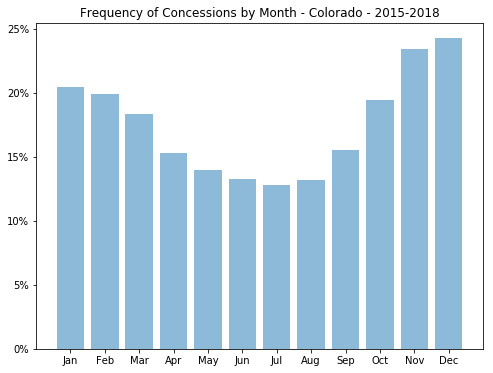

In [77]:
#Which months have the highest concessions? state of colorado, only using full year 2015 thru 2018 data
xx = co_month['Month']
yy = co_month['Rent_Disc_Frequency']
plt.figure(figsize = (8, 6))
plt.bar(xx, yy, alpha=0.5)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.title('Frequency of Concessions by Month - Colorado - 2015-2018')
plt.show()

In [51]:
metro_monthly['CBSA'].value_counts()

Denver-Aurora-Lakewood, CO    48
Colorado Springs, CO          48
Greeley, CO                   48
Boulder, CO                   48
Fort Collins, CO              48
Name: CBSA, dtype: int64

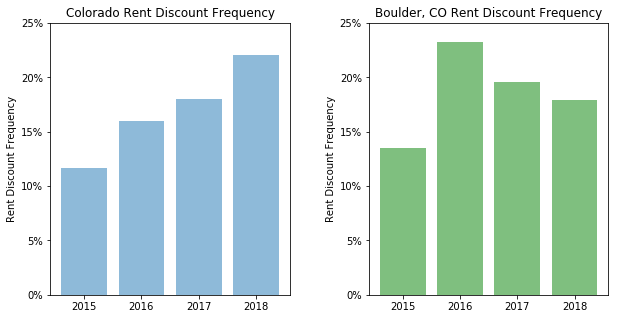

In [85]:
#select comparison metro from list above
#***When I tried to make bigger, had issues with the xaxis labels chaning (2018.5 etc)
comparison_metro = 'Boulder, CO'
comp_metro_data = metro_yearly[metro_yearly['CBSA'] == comparison_metro]
#comp_metro_data
xxx = co_yearly['oYear']
yyy = co_yearly['Rent_Disc_Frequency']
aaa = comp_metro_data['oYear']
bbb = comp_metro_data['Rent_Disc_Frequency']
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(xxx, yyy, alpha = 0.5)
plt.ylim(0, .25)
plt.ylabel('Rent Discount Frequency')
plt.title('Colorado Rent Discount Frequency')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 

plt.subplot(1, 2, 2)
plt.bar(aaa, bbb, alpha = 0.5, color = 'green')
plt.ylim(0, .25)
plt.ylabel('Rent Discount Frequency')
plt.title('{} Rent Discount Frequency'.format(comparison_metro))
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 

plt.subplots_adjust(wspace = 0.33)

plt.show()



In [ ]:
#If I wanted to make a chart for each of the five metros *(i.e. from a table that just had a list of the 5 metro names) without copying and pasting each, what would be best way to go about that?

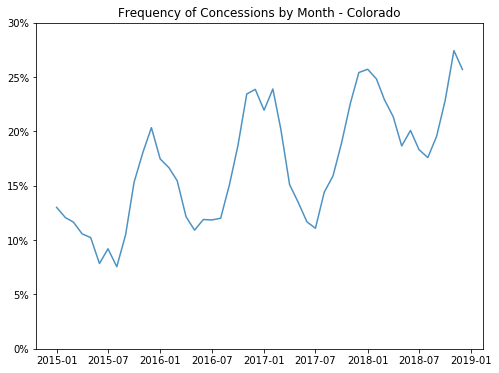

In [75]:
#Which months have the highest concessions? state of colorado, only using full year 2015 thru 2018 data
xxxx = co_monthly['Yr_Month']
yyyy = co_monthly['Rent_Disc_Frequency']
plt.figure(figsize = (8, 6))
plt.plot(xxxx, yyyy, alpha=0.8)
plt.ylim(0, .3)
plt.title('Frequency of Concessions by Month - Colorado')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 

plt.show()

In [87]:
#
apt_data_x = apt_data_d.loc[apt_data_d['YearBuilt'] <= 2009]
apt_data_x

,CBSA,PropertyID,YearBuilt,CreatedDate,ClusterName,MinRent,SpecialOfferTypeDesc,AltDate,oMonth,oYear,Any_Special,AnyRentSpecial
0,"Boulder, CO",825554,1984,53:58.4,Longmont/Northwest Boulder County MF,795,NoDiscount,07/12/2016,7,2016,0,0
1,"Boulder, CO",825554,1984,48:10.3,Longmont/Northwest Boulder County MF,850,NoDiscount,09/25/2015,9,2015,0,0
2,"Boulder, CO",825554,1984,56:06.1,Longmont/Northwest Boulder County MF,695,NoDiscount,02/02/2015,2,2015,0,0
3,"Boulder, CO",825554,1984,56:06.1,Longmont/Northwest Boulder County MF,695,NoDiscount,02/02/2015,2,2015,0,0
4,"Boulder, CO",825554,1984,24:32.5,Longmont/Northwest Boulder County MF,950,NoDiscount,05/11/2016,5,2016,0,0
5,"Boulder, CO",825554,1984,53:58.4,Longmont/Northwest Boulder County MF,795,NoDiscount,07/12/2016,7,2016,0,0
6,"Boulder, CO",825554,1984,35:58.5,Longmont/Northwest Boulder County MF,775,NoDiscount,01/18/2017,1,2017,0,0
7,"Boulder, CO",848324,1961,04:40.3,Longmont/Northwest Boulder County MF,725,NoDiscount,12/08/2016,12,2016,0,0
8,"Boulder, CO",848324,1961,32:20.1,Longmont/Northwest Boulder County MF,695,NoDiscount,05/03/2017,5,2017,0,0
9,"Boulder, CO",848324,1961,00:22.5,Longmont/Northwest Boulder County MF,795,NoDiscount,01/26/2016,1,2016,0,0


In [89]:
co_yearly_x = pd.DataFrame(apt_data_x.groupby(['oYear']).agg({'PropertyID':'count', 'Any_Special':'sum','AnyRentSpecial':'sum'}))
co_yearly_x.reset_index(inplace=True)
co_yearly_x['Any_Disc_Frequency'] = co_yearly_x.Any_Special / co_yearly_x.PropertyID
co_yearly_x['Rent_Disc_Frequency'] = co_yearly_x.AnyRentSpecial / co_yearly_x.PropertyID
co_yearly_x

,oYear,PropertyID,Any_Special,AnyRentSpecial,Any_Disc_Frequency,Rent_Disc_Frequency
0,2015,41009,6458,3471,0.157478,0.084640
1,2016,48731,11074,6323,0.227248,0.129753
2,2017,57393,14446,8524,0.251703,0.148520
3,2018,49368,15278,9130,0.309472,0.184938


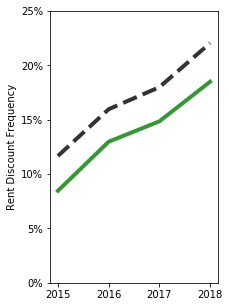

In [110]:
#variables from previous plot
#how to change legend name?
#xxx = co_yearly['oYear']
#yyy = co_yearly['Rent_Disc_Frequency']
ccc = co_yearly_x['oYear']
ddd = co_yearly_x['Rent_Disc_Frequency']
plt.figure(figsize=(3, 5))


plt.plot(xxx, yyy, alpha = 0.8, color = 'black', linewidth = 4, linestyle = 'dashed')
plt.plot(ccc, ddd, alpha = 0.8, color = 'green', linewidth = 4)
plt.ylim(0, .25)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 

plt.ylabel('Rent Discount Frequency')
#plt.title('Colorado Rent Discount Frequency')
#plt.legend(handles=('All Apartments','Pre-2010 Apartments'))

plt.show()